In [1]:
#导入需要的包
from contextlib import ContextDecorator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import time
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn import metrics
from sklearn import svm


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:

train = pd.read_csv('train.csv')
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [3]:
train.tail(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199990,train_199990,1,14.1475,1.8568,11.0066,3.6779,12.1944,-16.5936,5.3217,14.8508,...,-6.4708,4.7287,1.9034,7.2324,20.6047,1.7170,-4.0032,9.1627,13.8077,-1.9646
199991,train_199991,0,9.9909,2.5523,11.9653,6.3958,13.5497,-9.5293,6.0864,14.1789,...,12.0737,5.2139,0.8094,-0.6585,17.0548,0.5328,-5.3444,8.5414,13.2895,-6.7896
199992,train_199992,0,12.2825,2.6918,15.4684,6.4262,10.9863,9.9659,4.5030,9.9232,...,3.9514,10.9040,1.3472,5.6184,20.5498,-0.2854,7.6252,10.1758,17.4066,-11.5244
199993,train_199993,0,13.2152,-5.8006,9.7260,6.5910,12.4612,-7.1652,6.0666,12.9887,...,3.9357,8.8442,1.8096,-4.8314,22.0050,0.3916,6.7302,8.9709,14.5405,6.1149
199994,train_199994,0,12.3925,-5.8821,11.2323,3.9237,10.4509,10.7262,7.0503,18.6968,...,1.3911,6.8687,3.7788,6.3378,14.4656,-1.4843,-3.9299,9.1164,16.3170,-7.5048
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


# 1 EDA--exploratory data analysis

In [22]:
q = np.arange(5)
s = pd.Series(q)
s.describe()

count    5.000000
mean     2.000000
std      1.581139
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      4.000000
dtype: float64

In [21]:
#检查是否有缺失值
train.isnull().any().describe() #any 返回的series

count       202
unique        1
top       False
freq        202
dtype: object

In [5]:
#查看数据统计量信息。
train.describe() 

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


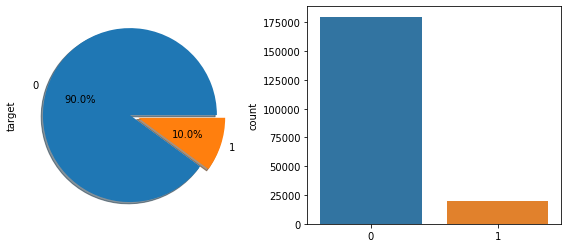

In [3]:
X = train.iloc[:, 2:].values.astype('float64')
Y = train['target'].values
f, ax = plt.subplots(1,2,figsize=(10,4))

train['target'].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True
)

sns.countplot(Y, ax=ax[1])

plt.show()

In [8]:
##检查是否有缺失值
train.isnull().any().describe()

count       202
unique        1
top       False
freq        202
dtype: object

In [4]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(20,30))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature],color='red',hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

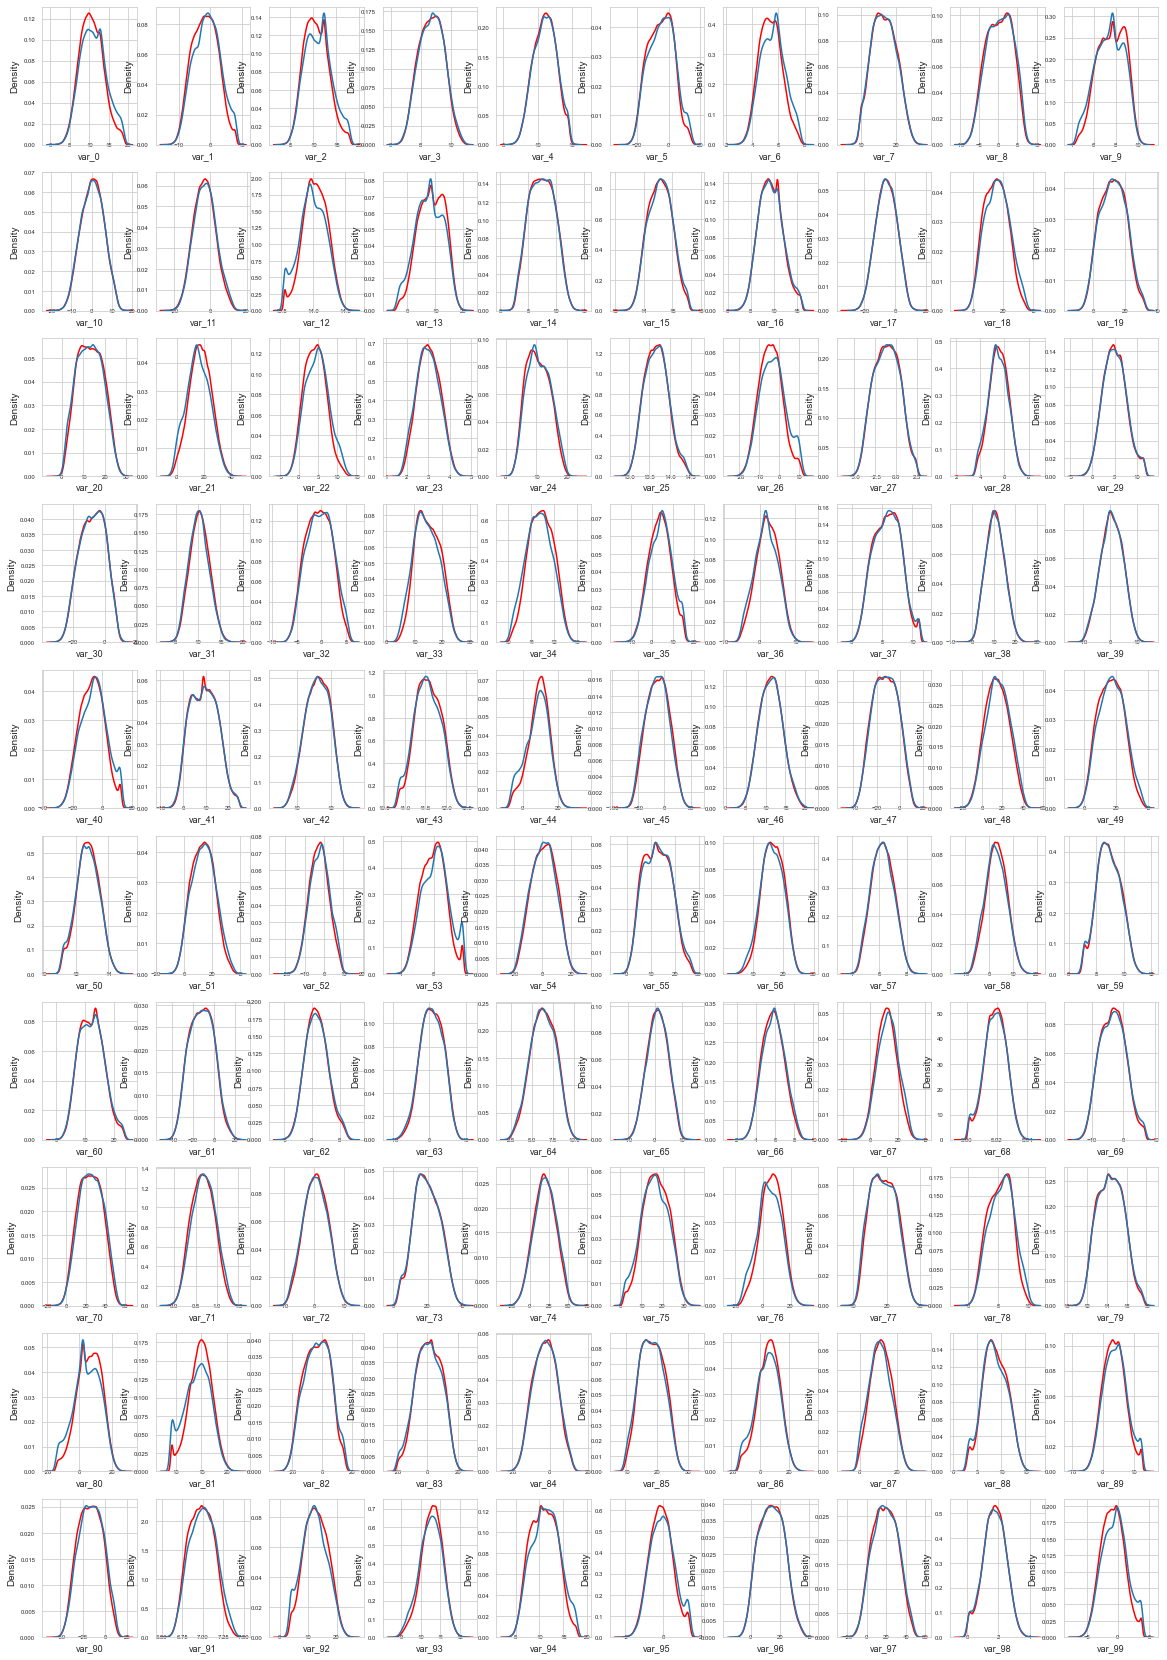

In [10]:
#显示每个指标在每种类型下面的分布情况
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:102]#将column压平
plot_feature_distribution(t0, t1, '0', '1', features)

In [11]:
train[train.target==1][features]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99
13,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,1.1064,8.6978,...,5.1511,7.0012,15.9338,10.1819,15.0883,0.4787,26.9915,6.6598,2.6128,-2.3490
29,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,1.2915,9.1168,...,-5.2911,6.9516,13.1476,10.0164,12.6318,-0.5166,17.4864,2.1070,2.0480,-1.9181
63,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,1.3999,6.6710,...,-10.0655,7.2069,9.5803,9.6099,15.3626,1.2164,25.4037,-0.7308,2.6200,-0.7385
65,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,5.8204,9.0358,...,-33.5923,6.7582,14.0713,10.8695,11.8909,-0.2430,9.6976,31.2444,2.3167,1.0664
71,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,-1.8922,9.1282,...,-27.7489,7.1995,14.6672,10.0111,14.2451,0.5513,11.8033,25.9304,2.1943,-1.1638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199966,13.5797,2.5526,6.0512,5.2730,12.2182,-3.4048,7.3623,17.8372,-3.5604,8.8837,...,-30.1162,7.2448,8.3160,10.7744,9.0767,1.1877,17.2779,3.8892,2.3115,0.3396
199976,7.9663,-2.8485,9.0919,7.3298,9.6690,-16.7872,4.5094,12.4351,-0.0113,8.5394,...,-8.0130,7.1097,14.2163,10.5002,9.3078,0.7518,26.5027,-0.8674,1.5119,-2.8378
199981,12.8140,0.6386,14.1657,7.1044,8.9365,-0.3274,6.5949,14.6078,-1.0373,8.8974,...,-32.8149,6.8301,12.7459,11.2750,13.2460,-0.3330,10.8978,27.4524,0.8928,2.3348
199986,12.0298,-8.7800,7.7071,7.4015,9.2305,-16.2174,5.9064,17.9268,3.6489,7.3970,...,7.0379,7.1038,9.8995,10.2926,13.9641,-0.8473,4.2883,24.3054,3.1054,1.8251


In [30]:
train[train.target==1][features].mean()

var_0      11.156418
var_1      -1.017613
var_2      11.156633
var_3       6.864113
var_4      11.131337
             ...    
var_195    -0.021130
var_196     2.688583
var_197     8.810815
var_198    15.393283
var_199    -2.532243
Length: 200, dtype: float64

In [32]:
train[train.target==0][features].mean().min()

-16.677374885215283

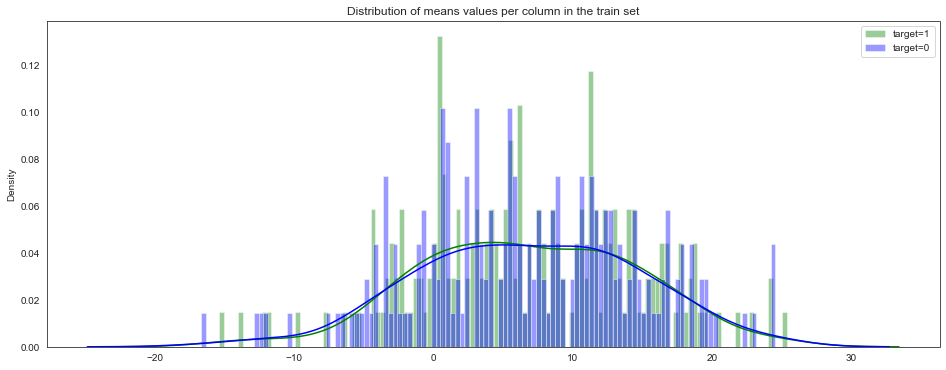

In [29]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
train[features].mean(axis=1)
plt.title("Distribution of means values per column in the train set")
sns.distplot(train[train.target==1][features].mean(),color="green", kde=True,bins=120, label='target=1')
sns.distplot(train[train.target==0][features].mean(),color="blue", kde=True,bins=120, label='target=0')
plt.legend()
plt.show()

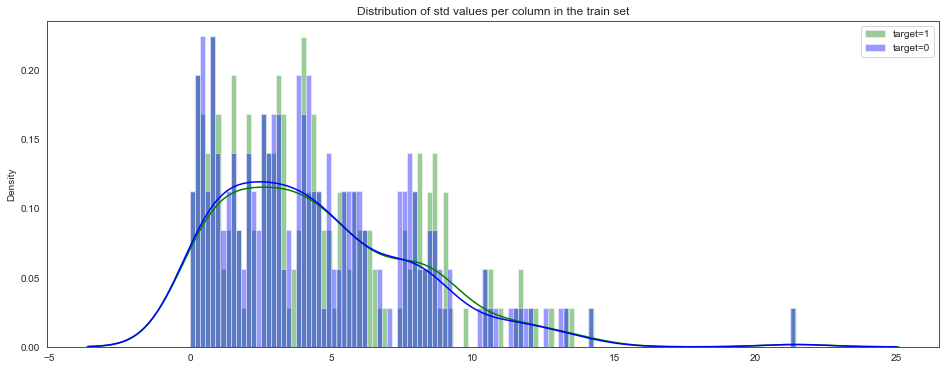

In [28]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
train[features].mean(axis=1)
plt.title("Distribution of std values per column in the train set")
sns.distplot(train[train.target==1][features].std(),color="green", kde=True,bins=120, label='target=1')
sns.distplot(train[train.target==0][features].std(),color="blue", kde=True,bins=120, label='target=0')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Plot of the Features')

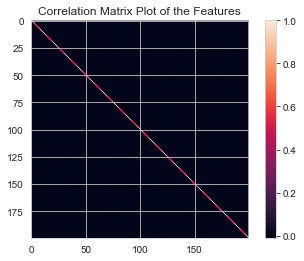

In [15]:
correlations = train[features].corr()
plt.imshow(correlations)
plt.colorbar()
plt.title('Correlation Matrix Plot of the Features')

In [16]:
def show_time(values):
    t = time.strftime('%H:%M:%S',time.gmtime(values))
    return t

data shape of train: (140000, 200)
data shape of test (60000, 200)


<AxesSubplot:ylabel='count'>

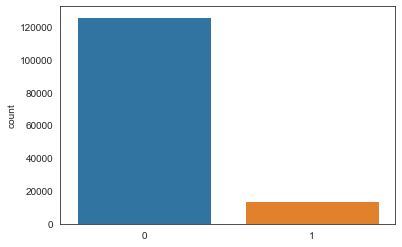

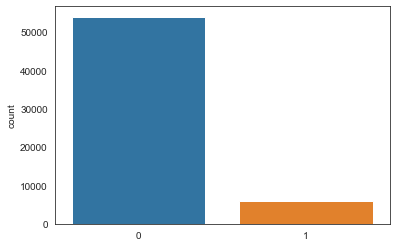

In [18]:
# 下面是划分训练集和测试集
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=52)
print('data shape of train:',x_train.shape)
print('data shape of test',x_test.shape)
plt.figure()
sns.countplot(y_train)
plt.figure()
sns.countplot(y_test)


In [14]:
def plot_confusion_mtx(cm,classes,cmap=plt.cm.Blues):
    #创建网格，用于显示数量
    sns.set_style('white')
    plt.figure(figsize=(5,5))
    plt.imshow(cm,cmap=cmap)

    #分别取对应的数据，填充到对应的位置
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    #设置x，y的坐标;前一个参数是在坐标轴上面产生的点的序列，后一个参数是每个点的label
    plt.xticks(np.arange(len(classes)),classes,rotation = 0)
    plt.yticks(np.arange(len(classes)),classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# 2.1 tpr,fpc,roc,auc study

[[4 0]
 [1 3]]


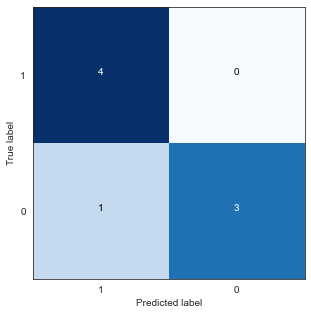

In [16]:
#%%
a1 = np.array([1,1,1,1,0,0,0,0])
a2 = np.array([1,1,1,1,0,0,0,1])
#%%

confusion_mtx =metrics.confusion_matrix(a1,a2,labels=[1,0])
print(confusion_mtx)
#%%
plot_confusion_mtx(confusion_mtx,[1,0])
# %%

[0.  0.5 0.5 1.  1. ] [0.  0.  0.5 0.5 1. ] [1.8  0.8  0.4  0.35 0.1 ]


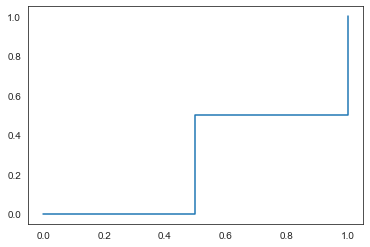

In [21]:
import numpy as np
from sklearn import metrics

y_01 = np.array([1, 1, 2, 2])
scores_01 = np.array([0.1, 0.4, 0.35, 0.8])
fpr_01, tpr_01, thresholds_01 = metrics.roc_curve(y_01, scores_01, pos_label=2)#pos_labels = 2,设定正实例为2,正实例2个，负实例2个
plt.plot(tpr_01,fpr_01)
print(tpr_01,fpr_01,thresholds_01)

In [ ]:
class ModelFac:
    def __init__(self,model,x_train,y_train):
        self._model = model
        self._x_train = x_train
        self._y_train = y_train
    
    @property
    def model(self):
        return self._model
    
    def fit(self):
        start_time = time.time()
        self._model.fit(self._x_train , self._y_train)
        print('fitting finished!')
        end_time = time.time()
        fit_time = end_time- start_time
        print('time consumed of fitting:',show_time(fit_time))
    
    def score(self,x_test,y_test):
        #下面是评价模型
        start_time = time.time()
        score = self._model.score(x_test, y_test)
        end_time = time.time()
        score_time = end_time - start_time
        print('scoring finished!')
        print('time consumed of scoring:',show_time(score_time))
        print('score is : ',score)
    
    def fit_and_score(self,x_test,y_test):
        self.fit()
        self.score(x_test,y_test)

    def show_confusion_mtx(self,x_test,y_test):
        predicted = self._model.predict(x_test)
        confusion_mtx = metrics.confusion_matrix(predicted, y_test,labels=[1,0])

        print(confusion_mtx)
        plot_confusion_mtx(confusion_mtx,classes=[1,0])
        acc = (confusion_mtx[0,0]+confusion_mtx[1,1])/confusion_mtx.sum()
        tpr = confusion_mtx[0,0]/(confusion_mtx[0,0]+confusion_mtx[0,1]) #也叫查全率(召回率),100个正实例中，找对了多少个，所以要比较大
        fpr = confusion_mtx[1,0]/(confusion_mtx[1,0]+confusion_mtx[1,1]) # 100个负实例当中，有多少个被判正了,所以要比较小
        ppv = confusion_mtx[0,0]/(confusion_mtx[0,0]+confusion_mtx[1,0]) #也叫精确率，也就是100个被判断为正实例当中，有多少个是真正的正实例，所以要比较大
        f1_score = 2*(tpr*ppv)/(tpr+ppv)
        print('acc is {}, tpr is {}, fpr is {}, ppv is {}, f1-score is {}'.format(acc,tpr,fpr,ppv,f1_score))
    
    def show_auc(self,x_test,y_test):
        x_prob = self._model.predict_proba(x_test)[:,1]
        fpr,tpr,thresholds = metrics.roc_curve(y_test,x_prob,pos_label=1)
        plt.figure()
        plt.title('the roc_curve ')
        plt.plot(fpr,tpr) 
        print('the auc is : ',metrics.roc_auc_score(y_test,x_prob))
        plt.show()

# 2.2  PCA

In [19]:
# 下面对数据进行降维
#标准化
std_scal = StandardScaler().fit(x_train)
x_train_std = std_scal.transform(x_train)
#主成分分析，通过求协方差矩阵的特征向量，利用特征向量构成的矩阵对原来的x进行转化-构成顺序按特征值大小逆序排序，转化后的特征数量是和x的特征数量相等的
sklearn_pca = sklearnPCA().fit(x_train_std)

#查看主成分分析后的个成分的方差信(采用百分比的方式)
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

l = len(cum_var_per[cum_var_per <= 0.7])
sklearn_pca = sklearnPCA(n_components=l).fit(x_train_std)

# 使用主成分分析的结果，对原特征进行较为
x_train_pca = sklearn_pca.transform(x_train_std)
x_test_pca = sklearn_pca.transform(std_scal.transform(x_test))
print('降维后的数据训练数据 shape：',x_train_pca.shape)
print('降维后的测试数据shape: ',x_test_pca.shape)

降维后的数据训练数据 shape： (140000, 137)
降维后的测试数据shape:  (60000, 137)


# 3 LogisticRegression

fitting finished!
time consumed of fitting: 00:01:06
scoring finished!
time consumed of scoring: 00:00:00
score is :  0.9145833333333333
[[ 1651   748]
 [ 4377 53224]]


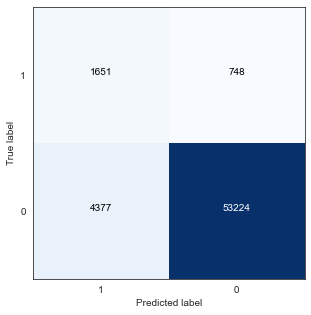

acc is 0.9145833333333333, tpr is 0.6882034180908712, fpr is 0.07598826409263729, ppv is 0.2738885202388852, f1-score is 0.39183576599026937
the auc is :  0.857854143791337


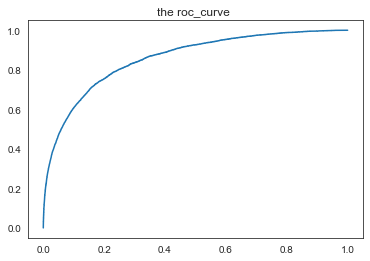

In [22]:
logit_model = ModelFac(LogisticRegression(C=0.3,dual=False,max_iter=x_train.shape[0]),x_train,y_train)
logit_model.fit_and_score(x_test,y_test)
logit_model.show_confusion_mtx(x_test,y_test)
logit_model.show_auc(x_test, y_test)

[[ 1651  4377]
 [  748 53224]]


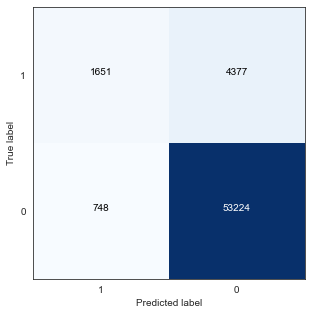

In [24]:
#logit_model.show_confusion_mtx(x_test,y_test)
confu_m = metrics.confusion_matrix(y_test,logit_model.model.predict(x_test),labels=[1,0])
print(confu_m)
plot_confusion_mtx(confu_m,[1,0])

fitting finished!
time consumed of fitting: 00:01:06
scoring finished!
time consumed of scoring: 00:00:00
score is :  0.9145833333333333
[[ 1651   748]
 [ 4377 53224]]


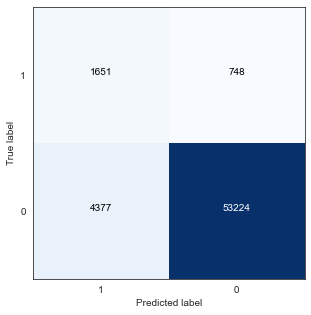

acc is 0.9145833333333333, tpr is 0.6882034180908712, fpr is 0.07598826409263729, ppv is 0.2738885202388852, f1-score is 0.39183576599026937
the auc is :  0.857854143791337


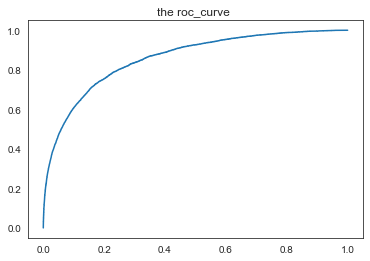

In [25]:
logit_model = ModelFac(LogisticRegression(C=0.3,dual=False,max_iter=x_train.shape[0]),x_train,y_train)
logit_model.fit_and_score(x_test,y_test)
logit_model.show_confusion_mtx(x_test,y_test)
logit_model.show_auc(x_test, y_test)

fitting finished!
time consumed of fitting: 00:01:16
scoring finished!
time consumed of scoring: 00:00:00
score is :  0.9146833333333333
[[ 1653   744]
 [ 4375 53228]]


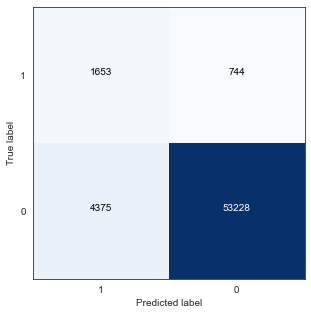

acc is 0.9146833333333333, tpr is 0.6896120150187734, fpr is 0.0759509053347916, ppv is 0.27422030524220303, f1-score is 0.39240356083086053
the auc is :  0.8579364384226165


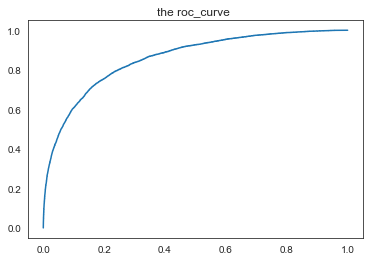

In [26]:
logit_model = ModelFac(LogisticRegression(C=0.8,dual=False,max_iter=x_train.shape[0]),x_train,y_train)
logit_model.fit_and_score(x_test,y_test)
logit_model.show_confusion_mtx(x_test,y_test)
logit_model.show_auc(x_test, y_test)

In [27]:
##执行网格搜索
grid_logit = model_selection.GridSearchCV(
    LogisticRegression(random_state=52),
    cv = 5,
    param_grid={
        'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
        'solver': ('lbfgs', 'sag')
    },
    scoring='roc_auc'
)
grid_logit.fit(x_train_pca,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=52),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'solver': ('lbfgs', 'sag')},
             scoring='roc_auc')

[[ 1496   697]
 [ 4532 53275]]


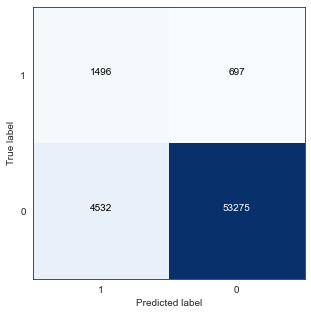

acc is 0.91285, tpr is 0.6821705426356589, fpr is 0.07839880983271923, ppv is 0.24817518248175183, f1-score is 0.36394599197177957
the auc is :  0.8498699016979042


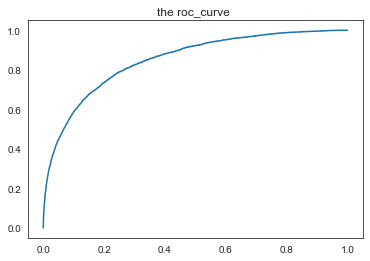

test score is :  0.8498699016979042


In [28]:
model = ModelFac(grid_logit,x_train_pca,y_train)
model.show_confusion_mtx(x_test_pca,y_test)
model.show_auc(x_test_pca,y_test)
print('test score is : ',model.model.score(x_test_pca,y_test))

In [29]:
print(grid_logit.best_params_,grid_logit.best_score_)

{'C': 0.1, 'solver': 'sag'} 0.8520041678822142


# 4 svm

fitting finished!
time consumed of fitting: 04:05:38
scoring finished!
time consumed of scoring: 00:04:29
score is :  0.8995333333333333
[[    0     0]
 [ 6028 53972]]


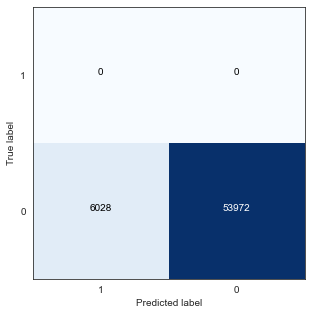

acc is 0.8995333333333333, tpr is nan, fpr is 0.10046666666666666, ppv is 0.0, f1-score is nan


AttributeError: predict_proba is not available when  probability=False

In [30]:
#下面使用svm对数据进行分析
svm_model = ModelFac(svm.SVC(C=0.5,kernel='rbf',gamma=0.001),x_train,y_train)
# %%
svm_model.fit_and_score(x_test,y_test)
svm_model.show_confusion_mtx(x_test,y_test)
svm_model.show_auc(x_test,y_test)

# 5 NN

fitting finished!
time consumed of fitting: 00:04:11
scoring finished!
time consumed of scoring: 00:00:00
score is :  0.9290357142857143
[[ 2063  2009]
 [ 3965 51963]]


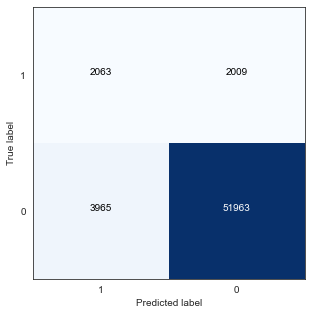

acc is 0.9004333333333333, tpr is 0.5066306483300589, fpr is 0.07089472178515234, ppv is 0.34223623092236233, f1-score is 0.40851485148514854
the auc is :  0.8294174174512372


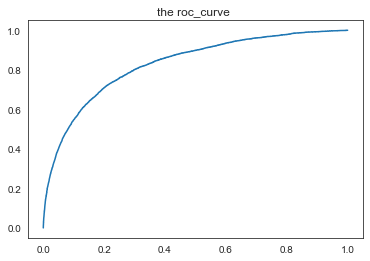

In [34]:
# 下面使用mpl对数据进行训练
from sklearn import neural_network
nn_model = ModelFac(neural_network.MLPClassifier(solver='sgd',activation="relu",hidden_layer_sizes=(100, )),x_train,y_train)
nn_model.fit_and_score(x_train,y_train)
nn_model.show_confusion_mtx(x_test,y_test)
nn_model.show_auc(x_test,y_test)

fitting finished!
time consumed of fitting: 00:03:15
scoring finished!
time consumed of scoring: 00:00:00
score is :  0.9155785714285715
[[ 1756  1397]
 [ 4272 52575]]


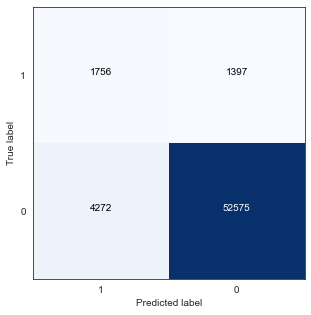

acc is 0.9055166666666666, tpr is 0.556929908024104, fpr is 0.07514908438440024, ppv is 0.2913072329130723, f1-score is 0.3825291362596667
the auc is :  0.8339314012313692


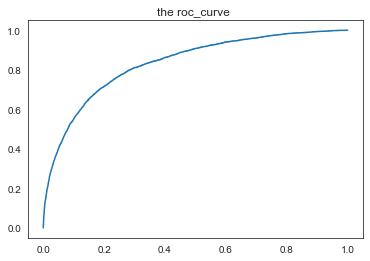

In [37]:
from sklearn import neural_network
nn_model = ModelFac(neural_network.MLPClassifier(solver='adam',activation="logistic",hidden_layer_sizes=(150, )),x_train,y_train)
nn_model.fit_and_score(x_train,y_train)
nn_model.show_confusion_mtx(x_test,y_test)
nn_model.show_auc(x_test,y_test)

fitting finished!
time consumed of fitting: 00:03:48
scoring finished!
time consumed of scoring: 00:00:00
score is :  0.9799142857142857
[[ 1833  3847]
 [ 4195 50125]]


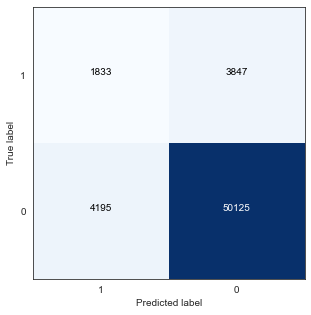

acc is 0.8659666666666667, tpr is 0.3227112676056338, fpr is 0.07722754050073638, ppv is 0.30408095554080955, f1-score is 0.3131192347113085
the auc is :  0.7375703079052369


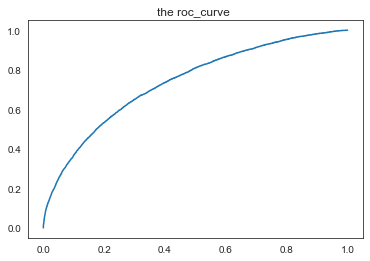

In [36]:
nn_model_pca = ModelFac(neural_network.MLPClassifier(solver='adam',activation="logistic",hidden_layer_sizes=(100, )),x_train_pca,y_train)
nn_model_pca.fit_and_score(x_train_pca,y_train)
nn_model_pca.show_confusion_mtx(x_test_pca,y_test)
nn_model_pca.show_auc(x_test_pca,y_test)

In [ ]:
grid_logit = model_selection.GridSearchCV(
    neural_network.MLPClassifier(),
    cv = 5,
    param_grid={
        'activation': ['logistic', 'tanh', 'relu'], 
        'solver': ('sgd', 'adma'),
        'hidden_layer_sizes':[(80, ),(100, ),(120, ),(140, )]
    },
    scoring='roc_auc'
)
grid_logit.fit(x_train,y_train)

In [ ]:
model = ModelFac(grid_logit,x_train_pca,y_train)
model.show_confusion_mtx(x_test_pca,y_test)
model.show_auc(x_test_pca,y_test)
print('test score is : ',model.model.score(x_test_pca,y_test))